<a href="https://colab.research.google.com/github/Hectmtz/fireDots/blob/main/NASA_Managing_Fire_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [84]:
!ls "/content/gdrive/My Drive/Colab Notebooks/NASA_FIRE_HUNTERS/Data"

MXM00076519.csv  MXM00076581.csv  MXM00076656.csv  MXM00076687.csv
MXM00076525.csv  MXM00076585.csv  MXM00076658.csv  MXM00076692.csv
MXM00076539.csv  MXM00076612.csv  MXM00076662.csv  MXM00076726.csv
MXM00076548.csv  MXM00076625.csv  MXM00076665.csv  MXM00076737.csv
MXM00076556.csv  MXM00076632.csv  MXM00076675.csv  MXM00076762.csv
MXM00076571.csv  MXM00076634.csv  MXM00076680.csv  MXM00076773.csv
MXM00076573.csv  MXM00076640.csv  MXM00076683.csv  MXM00076775.csv
MXM00076577.csv  MXM00076654.csv  MXM00076685.csv


In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import folium as fl
from folium.plugins import MiniMap
from folium.plugins import FloatImage
import statistics
import numpy as np

In [111]:
zona = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/NASA_FIRE_HUNTERS/fire_zone_complete.csv')

In [112]:
print(zona)

      latitude  longitude  bright_ti4  scan  track   acq_date  acq_time  \
0     18.83591  -97.27461      317.90  0.39   0.37  10/1/2022       801   
1     19.00897 -104.25884      323.47  0.61   0.53  10/1/2022       803   
2     19.47581  -99.17077      329.66  0.36   0.57  10/1/2022      1910   
3     18.59710  -98.55933      349.26  0.34   0.56  10/1/2022      1913   
4     20.57599 -101.16718      339.44  0.74   0.76  10/1/2022      2053   
...        ...        ...         ...   ...    ...        ...       ...   
1682  17.49347  -95.88402      310.29  0.48   0.40  9/28/2023       813   
1683  17.20877  -95.77422      334.90  0.47   0.39  9/28/2023      1923   
1684  19.29516  -99.55483      330.02  0.47   0.48  9/28/2023      1925   
1685  19.97433  -99.18456      295.33  0.56   0.43  9/29/2023       754   
1686  18.52874  -96.09805      322.35  0.40   0.37  9/29/2023       756   

      satellite instrument confidence version  bright_ti5    frp daynight  
0             1      VI

In [113]:
df_max_bright_ti4 = zona.groupby('acq_date').apply(lambda x: x[x['bright_ti4'] == x['bright_ti4'].max()]).reset_index(drop=True)
lat = statistics.mean(df_max_bright_ti4['latitude'])
lon= statistics.mean(df_max_bright_ti4['longitude'])

In [114]:
df_max_bright_ti4

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
0,18.99991,-96.57399,346.49,0.64,0.72,1/1/2023,1847,1,VIIRS,n,2.0NRT,291.52,9.34,D
1,18.72023,-103.62555,339.02,0.57,0.69,1/10/2023,1917,1,VIIRS,n,2.0NRT,298.61,8.46,D
2,19.25014,-98.37618,367.00,0.52,0.67,1/11/2023,1900,1,VIIRS,h,2.0NRT,299.59,9.74,D
3,19.18155,-96.23671,340.63,0.61,0.53,1/12/2023,728,1,VIIRS,n,2.0NRT,289.76,8.96,N
4,22.47323,-105.41736,337.59,0.42,0.38,1/13/2023,2004,1,VIIRS,n,2.0NRT,307.55,3.77,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,20.17406,-102.72761,345.71,0.40,0.37,9/5/2023,1957,1,VIIRS,n,2.0NRT,297.80,5.34,D
359,17.93064,-102.19852,351.48,0.46,0.47,9/6/2023,1938,1,VIIRS,n,2.0NRT,293.42,19.94,D
360,20.03113,-99.27277,329.77,0.55,0.51,9/7/2023,1919,1,VIIRS,n,2.0NRT,297.47,4.00,D
361,21.79556,-99.33245,349.72,0.52,0.66,9/8/2023,1902,1,VIIRS,n,2.0NRT,296.04,8.85,D


In [90]:
mapa2 = fl.Map([lat, lon], zoom_start=6)

for i in range(0,363):
  fl.Marker(
    location=[df_max_bright_ti4['latitude'][i],df_max_bright_ti4['longitude'][i]],
    tooltip="Click me!",
    popup="Mt. Hood Meadows",
    icon=fl.Icon(icon="cloud"),
  ).add_to(mapa2)

mapa2

# Match coordinates

In [91]:
import os
import glob
import gdown

In [92]:
latMax=max(df_max_bright_ti4['latitude'])
latMin= min(df_max_bright_ti4['latitude'])
longMin=min(df_max_bright_ti4['longitude'])
longMax=max(df_max_bright_ti4['longitude'])
print(latMax)
print(latMin)
print(longMax)
print(longMin)

22.89993
17.0003
-95.0071
-105.82293


In [93]:
df_max_bright_ti4

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
0,18.99991,-96.57399,346.49,0.64,0.72,1/1/2023,1847,1,VIIRS,n,2.0NRT,291.52,9.34,D
1,18.72023,-103.62555,339.02,0.57,0.69,1/10/2023,1917,1,VIIRS,n,2.0NRT,298.61,8.46,D
2,19.25014,-98.37618,367.00,0.52,0.67,1/11/2023,1900,1,VIIRS,h,2.0NRT,299.59,9.74,D
3,19.18155,-96.23671,340.63,0.61,0.53,1/12/2023,728,1,VIIRS,n,2.0NRT,289.76,8.96,N
4,22.47323,-105.41736,337.59,0.42,0.38,1/13/2023,2004,1,VIIRS,n,2.0NRT,307.55,3.77,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,20.17406,-102.72761,345.71,0.40,0.37,9/5/2023,1957,1,VIIRS,n,2.0NRT,297.80,5.34,D
359,17.93064,-102.19852,351.48,0.46,0.47,9/6/2023,1938,1,VIIRS,n,2.0NRT,293.42,19.94,D
360,20.03113,-99.27277,329.77,0.55,0.51,9/7/2023,1919,1,VIIRS,n,2.0NRT,297.47,4.00,D
361,21.79556,-99.33245,349.72,0.52,0.66,9/8/2023,1902,1,VIIRS,n,2.0NRT,296.04,8.85,D


In [94]:
# Leer todos los archivos de la carpeta
files = glob.glob(os.path.join('/content/gdrive/My Drive/Colab Notebooks/NASA_FIRE_HUNTERS/Data', '*'))

# Imprimir la lista de archivos
print("Archivos en la carpeta:")
for file in files:
    print(file)


Archivos en la carpeta:
/content/gdrive/My Drive/Colab Notebooks/NASA_FIRE_HUNTERS/Data/MXM00076577.csv
/content/gdrive/My Drive/Colab Notebooks/NASA_FIRE_HUNTERS/Data/MXM00076680.csv
/content/gdrive/My Drive/Colab Notebooks/NASA_FIRE_HUNTERS/Data/MXM00076573.csv
/content/gdrive/My Drive/Colab Notebooks/NASA_FIRE_HUNTERS/Data/MXM00076658.csv
/content/gdrive/My Drive/Colab Notebooks/NASA_FIRE_HUNTERS/Data/MXM00076737.csv
/content/gdrive/My Drive/Colab Notebooks/NASA_FIRE_HUNTERS/Data/MXM00076662.csv
/content/gdrive/My Drive/Colab Notebooks/NASA_FIRE_HUNTERS/Data/MXM00076675.csv
/content/gdrive/My Drive/Colab Notebooks/NASA_FIRE_HUNTERS/Data/MXM00076519.csv
/content/gdrive/My Drive/Colab Notebooks/NASA_FIRE_HUNTERS/Data/MXM00076656.csv
/content/gdrive/My Drive/Colab Notebooks/NASA_FIRE_HUNTERS/Data/MXM00076585.csv
/content/gdrive/My Drive/Colab Notebooks/NASA_FIRE_HUNTERS/Data/MXM00076692.csv
/content/gdrive/My Drive/Colab Notebooks/NASA_FIRE_HUNTERS/Data/MXM00076634.csv
/content/gdrive/

In [95]:
!pip install geodatasets cartopy
!pip install geopandas

import geopandas
import matplotlib.pyplot as plt
from cartopy import crs as ccrs
from geodatasets import get_path

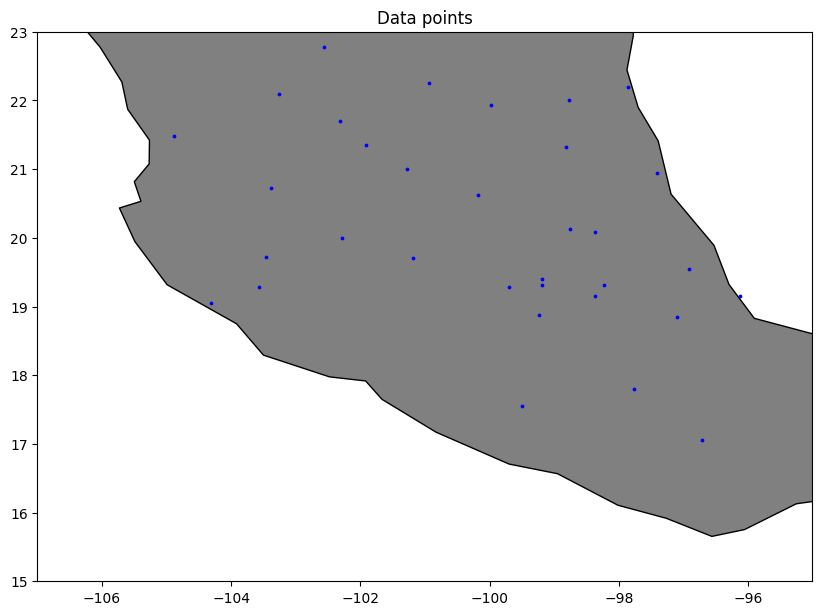

In [101]:
df_2 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/NASA_FIRE_HUNTERS/selected_zones.csv')
df_2
df_datos = df_2[(df_2['longitud'] >= -120) & (df_2['latitud'] >= 15) & (df_2['longitud'] <= -85) & (df_2['latitud'] <= 35)].copy()


gdf_2 = geopandas.GeoDataFrame(
    df_datos, geometry = geopandas.points_from_xy(df_datos.longitud, df_datos.latitud), crs = "EPSG:4326"
)

# set our extent
extent = [-107, 15, -95, 23]
ax = world.plot(figsize=(10, 10), color="grey", edgecolor="black")
ax.set_xlim([extent[0],  extent[2]])
ax.set_ylim([extent[1],  extent[3]])

ax.set(title='Data points')

gdf_2.plot(ax=ax, color="blue", markersize=3)

plt.show()

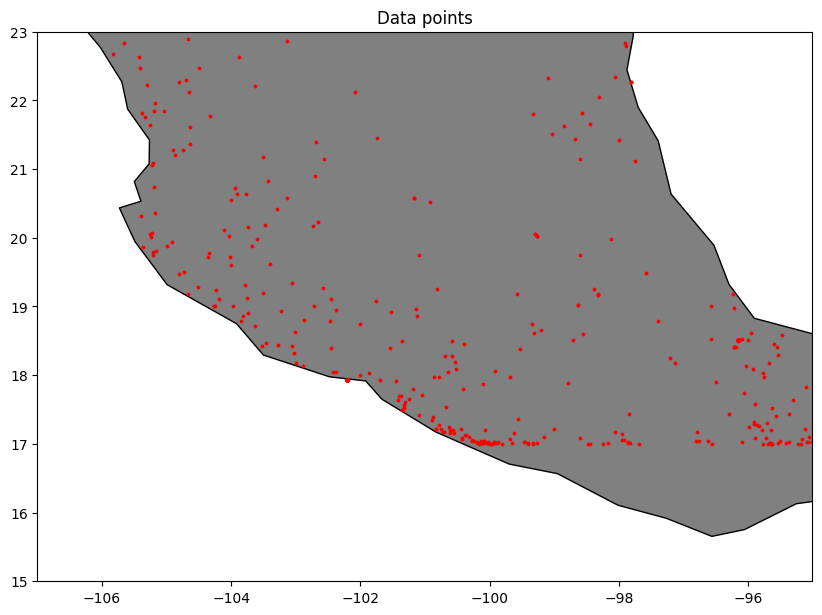

In [118]:
df_datos = df_max_bright_ti4[(df_max_bright_ti4['longitude'] >= -120) & (df_max_bright_ti4['latitude'] >= 15) & (df_max_bright_ti4['longitude'] <= -85) & (df_max_bright_ti4['latitude'] <= 35)].copy()


gdf_3 = geopandas.GeoDataFrame(
    df_datos, geometry = geopandas.points_from_xy(df_datos.longitude, df_datos.latitude), crs = "EPSG:4326"
)

# set our extent
extent = [-107, 15, -95, 23]
ax = world.plot(figsize=(10, 10), color="grey", edgecolor="black")
ax.set_xlim([extent[0],  extent[2]])
ax.set_ylim([extent[1],  extent[3]])

ax.set(title='Fire points')

gdf_3.plot(ax=ax, color="red", markersize=3)

plt.show()

In [99]:
def in_area(latitud, longitud, latitud_min, longitud_min, latitud_max, longitud_max):
    if latitud_min <= latitud <= latitud_max and longitud_min <= longitud <= longitud_max:
        #print("Buscando" + str(latitud) + str(longitud) + "en las coordenadas" + str(latitud_min) + ", " + str(longitud_min) + str(latitud_max) + ", " + str(longitud_max))
        return True
    else:
        return False

In [100]:
lat_step = 1
lon_step = 1
cuadrantes = []
aux = np.zeros((6,11))

i = 0
for lat_start in range(int(latMin), int(latMax)+1, int(lat_step)):
  j = 0
  for lon_start in range(int(longMin), int(longMax), int(lon_step)):
    lat_end = lat_start + lat_step
    lon_end = lon_start + lon_step
    cuadrantes.append(((lat_start, lat_end), (lon_start, lon_end)))
    for file in files:
      bandera = False
      mat = pd.read_csv(file,parse_dates=True, index_col=1)
      bandera = in_area(mat['LATITUDE'][0],mat['LONGITUDE'][0], lat_start, lon_start, lat_end, lon_end)
      if(bandera == True):
        aux[i][j] += 1
    j+=1
  i+=1
cuadrantes

[((17, 18), (-105, -104)),
 ((17, 18), (-104, -103)),
 ((17, 18), (-103, -102)),
 ((17, 18), (-102, -101)),
 ((17, 18), (-101, -100)),
 ((17, 18), (-100, -99)),
 ((17, 18), (-99, -98)),
 ((17, 18), (-98, -97)),
 ((17, 18), (-97, -96)),
 ((17, 18), (-96, -95)),
 ((18, 19), (-105, -104)),
 ((18, 19), (-104, -103)),
 ((18, 19), (-103, -102)),
 ((18, 19), (-102, -101)),
 ((18, 19), (-101, -100)),
 ((18, 19), (-100, -99)),
 ((18, 19), (-99, -98)),
 ((18, 19), (-98, -97)),
 ((18, 19), (-97, -96)),
 ((18, 19), (-96, -95)),
 ((19, 20), (-105, -104)),
 ((19, 20), (-104, -103)),
 ((19, 20), (-103, -102)),
 ((19, 20), (-102, -101)),
 ((19, 20), (-101, -100)),
 ((19, 20), (-100, -99)),
 ((19, 20), (-99, -98)),
 ((19, 20), (-98, -97)),
 ((19, 20), (-97, -96)),
 ((19, 20), (-96, -95)),
 ((20, 21), (-105, -104)),
 ((20, 21), (-104, -103)),
 ((20, 21), (-103, -102)),
 ((20, 21), (-102, -101)),
 ((20, 21), (-101, -100)),
 ((20, 21), (-100, -99)),
 ((20, 21), (-99, -98)),
 ((20, 21), (-98, -97)),
 ((20,

In [ ]:
print(aux)

In [ ]:
!ls "/content/gdrive/My Drive/Colab Notebooks/NASA_FIRE_HUNTERS"

In [ ]:
i=0
for file in files:
  dataset = pd.read_csv(file)
  dataset['FIRE'] = 0
  dataset['DATE'] = pd.to_datetime(dataset['DATE'], format='%m/%d/%Y')
  dataset.to_csv('/content/gdrive/My Drive/Colab Notebooks/NASA_FIRE_HUNTERS/Data_Nueva/'+str(i)+'.csv')
  print(len(dataset))
  i+=1

In [ ]:
# Leer todos los archivos de la carpeta
files_data2 = glob.glob(os.path.join('/content/gdrive/My Drive/Colab Notebooks/NASA_FIRE_HUNTERS/Data_Nueva', '*'))

# Imprimir la lista de archivos
print("Archivos en la carpeta:")
for file in files_data2:
    print(file)

In [ ]:
import numpy as np
import pandas as pd

lat_step = 1
lon_step = 1
cuadrantes = []

# Crear una matriz con listas para almacenar los nombres de archivos
aux_names = [[[] for _ in range(11)] for _ in range(6)]

i = 0
for lat_start in range(int(latMin), int(latMax) + 1, int(lat_step)):
    j = 0
    for lon_start in range(int(longMin), int(longMax), int(lon_step)):
        lat_end = lat_start + lat_step
        lon_end = lon_start + lon_step
        cuadrante = ((lat_start, lat_end), (lon_start, lon_end))
        cuadrantes.append(cuadrante)

        for file in files_data2:
            bandera = False
            mat = pd.read_csv(file, parse_dates=True, index_col=1)
            bandera = in_area(mat['LATITUDE'][0], mat['LONGITUDE'][0], lat_start, lon_start, lat_end, lon_end)

            if bandera:
                # Agregar el nombre del archivo a la lista de la casilla actual
                aux_names[i][j].append(file)

        j += 1
    i += 1

In [ ]:
aux_names

In [ ]:
import numpy as np

lat_step = 1
lon_step = 1
cuadrantes = []
aux_2 = np.zeros((6, 11), dtype=int)

# Crear una lista de listas para almacenar los índices de filas
indices_por_cuadrante = [[[] for _ in range(11)] for _ in range(6)]

i = 0
for lat_start in range(int(latMin), int(latMax) + 1, int(lat_step)):
    j = 0
    for lon_start in range(int(longMin), int(longMax), int(lon_step)):
        lat_end = lat_start + lat_step
        lon_end = lon_start + lon_step
        cuadrantes.append(((lat_start, lat_end), (lon_start, lon_end)))

        for k in range(len(df_max_bright_ti4)):
            bandera = False
            latitude = df_max_bright_ti4['latitude'][k]
            longitude = df_max_bright_ti4['longitude'][k]
            bandera = in_area(latitude, longitude, lat_start, lon_start, lat_end, lon_end)

            if bandera:
                aux_2[i][j] += 1
                # Guardar el índice de la fila donde la bandera es True
                indices_por_cuadrante[i][j].append(k)

        j += 1
    i += 1

# Indices por cuadrante


In [ ]:
print(indices_por_cuadrante)

# Acceso a indices por indice de matriz

In [ ]:
match_matrix = np.zeros((6, 11))
for i in range(6):
  for j in range(11):
    if(aux[i][j] > 0 and aux_2[i][j] > 0):
      match_matrix[i][j] = 1
print(match_matrix)

# Data set final


In [ ]:
!ls "/content/gdrive/My Drive/Colab Notebooks/NASA_FIRE_HUNTERS"

In [ ]:
# Itera a través de las fechas en df2 y actualiza la columna 'fire' en df1 cuando haya una coincidencia
df_max_bright_ti4['acq_date'] = pd.to_datetime(df_max_bright_ti4['acq_date'])
for i in range(0,6):
  for j in range(0,11):
    if(match_matrix[i][j] == 1):
      algo = aux_names[i][j]
      for k in range(0,len(algo)):
        dataset2 = pd.read_csv(algo[k])
        for date in df_max_bright_ti4['acq_date']:
          dataset2['DATE'] = pd.to_datetime(dataset2['DATE'])
          for x in range(0,len(dataset2)):
            if(dataset2['DATE'][x] == date):
              dataset2.loc[dataset2['DATE'] == date, 'FIRE'] = 1
              dataset2.to_csv('/content/gdrive/My Drive/Colab Notebooks/NASA_FIRE_HUNTERS/Data_GRNN/'+str(i)+':'+str(j)+str(k)+'.csv')
      #print(dataset2)

##GRNN

In [ ]:
# Leer todos los archivos de la carpeta
files2 = glob.glob(os.path.join('/content/gdrive/My Drive/Colab Notebooks/NASA_FIRE_HUNTERS/Data_GRNN', '*'))

# Imprimir la lista de archivos
print("Archivos en la carpeta:")
for file in files2:
    print(file)

In [ ]:
!pip install pygrnn

In [ ]:
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split, GridSearchCV

from pyGRNN import GRNN #imports the GRNN regressor module
from pyGRNN import feature_selection as FS #imports the GRNN feature selector module

In [ ]:
c1_1 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/NASA_FIRE_HUNTERS/Data_GRNN/0:50.csv')
c1_2 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/NASA_FIRE_HUNTERS/Data_GRNN/0:70.csv')
c1_3 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/NASA_FIRE_HUNTERS/Data_GRNN/0:80.csv')

In [ ]:
c1_1

In [ ]:
t_max= c1_1['TMAX']
t_min= c1_1['TMIN']
t_avg= c1_1['TAVG']
prob_fire = c1_1['FIRE']